In [13]:
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
from math import *
import sys
sys.path.insert(0, '..')
from pp import kdata, zigzag, patternfinder
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:
kdatasvc = kdata.KDataSvc("203.67.19.12")
today = date.today()
start_date = date(today.year - 2, today.month, today.day)
end_date = today
klist = kdatasvc.getdata("2330.TW", 8, start_date, end_date)

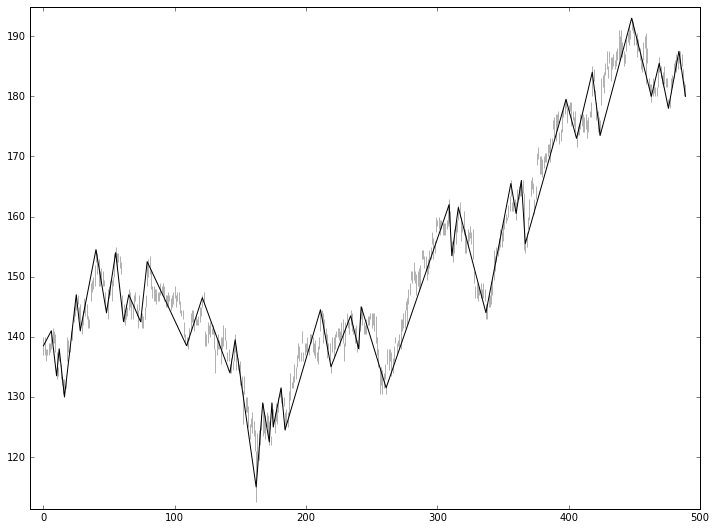

In [98]:
threshold = 0.03
finder = patternfinder.Finder(klist)
finder.init_pivots(threshold)
finder.plot(width=12, height=9)

DBOTTOM@ 20150319


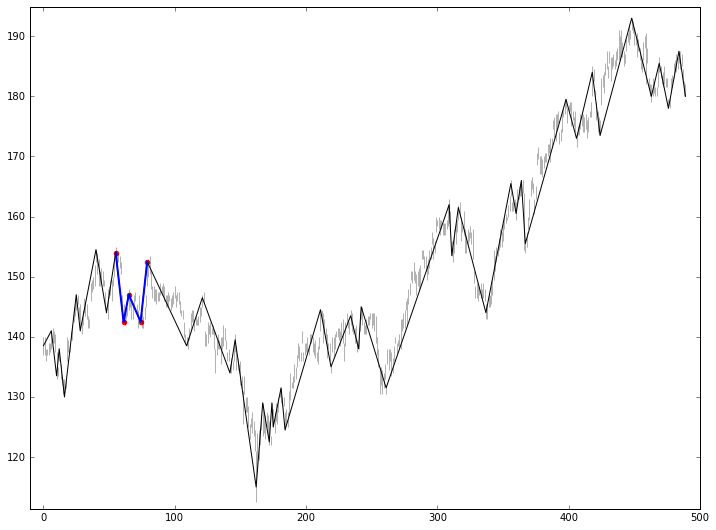

DTOP@ 20150130


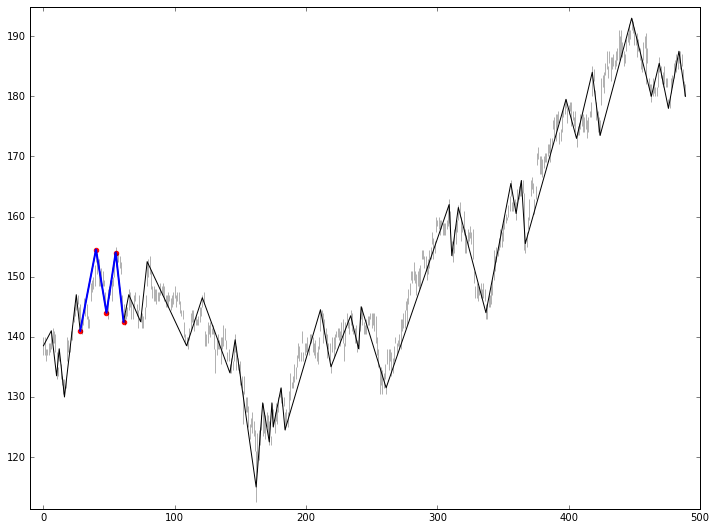

DTOP@ 20160114


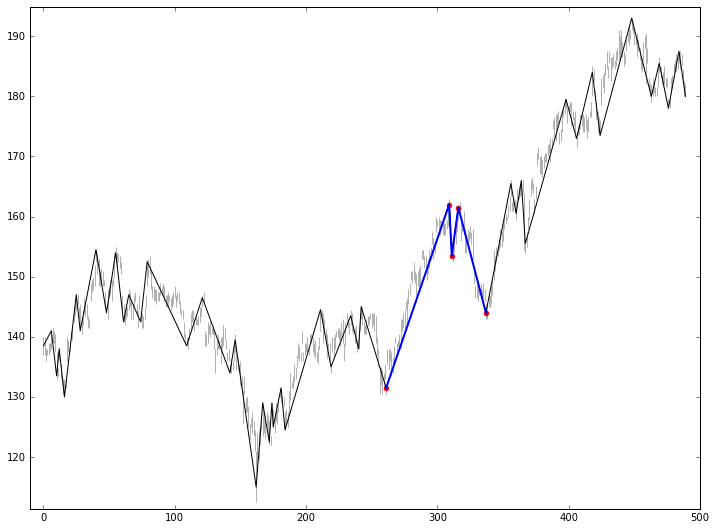

DTOP@ 20160513


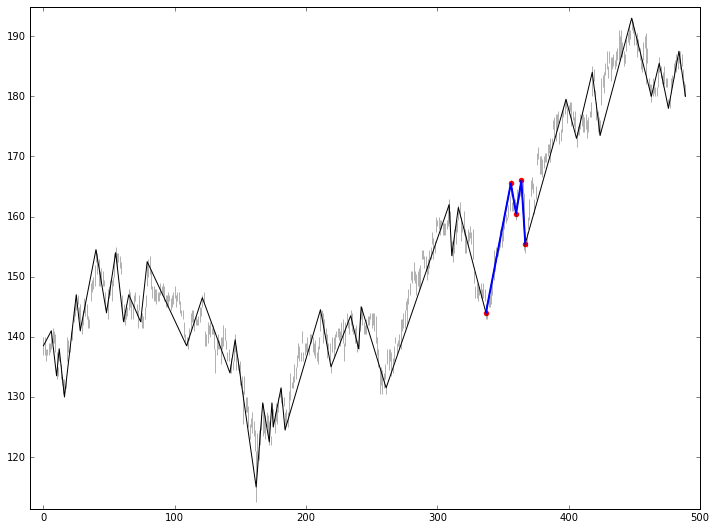

In [103]:
delta = 0.005
patterns = finder.find_hs(delta)
for pattern in patterns:
    print "HS@", finder.klist[pattern[0]].date
    finder.plot(pattern)

patterns = finder.find_ihs(delta)
for pattern in patterns:
    print "IHS@", finder.klist[pattern[0]].date
    finder.plot(pattern)

patterns = finder.find_double_bottom(delta)
for pattern in patterns:
    print "DBOTTOM@", finder.klist[pattern[0]].date
    finder.plot(pattern)

patterns = finder.find_double_top(delta)
for pattern in patterns:
    print "DTOP@", finder.klist[pattern[0]].date
    finder.plot(pattern)

In [20]:
kdatasvc = kdata.KDataSvc("203.67.19.12")
today = date.today()
start_date = date(today.year - 2, today.month, today.day)
end_date = today
thresh = 0.05
top_100 = "2330.TW,2317.TW,6505.TW,2412.TW,2882.TW,1303.TW,1301.TW,1326.TW,2881.TW,3008.TW,2308.TW,2002.TW,2454.TW,3045.TW,2891.TW,2886.TW,1216.TW,2311.TW,2912.TW,4904.TW,2382.TW,2892.TW,2207.TW,2105.TW,2357.TW,4938.TW,2474.TW,2880.TW,5880.TW,2884.TW,2395.TW,2801.TW,2325.TW,2885.TW,2303.TW,1101.TW,2408.TW,1402.TW,2883.TW,2354.TW,9904.TW,2301.TW,3481.TW,2409.TW,2887.TW,2823.TW,2890.TW,8464.TW,1102.TW,1476.TW,2888.TW,2324.TW,9910.TW,2356.TW,9921.TW,1227.TW,6239.TW,2498.TW,3034.TW,2377.TW,3702.TW,5871.TW,3231.TW,2618.TW,2227.TW,1504.TW,2347.TW,2542.TW,2385.TW,9945.TW,4958.TW,2915.TW,2610.TW,2379.TW,1434.TW,2834.TW,3532.TW,2633.TW,1590.TW,3682.TW,9914.TW,2201.TW,2106.TW,2353.TW,1605.TW,1722.TW,2603.TW,9917.TW,3044.TW,2049.TW,1802.TW,2059.TW,6415.TW,2723.TW,9933.TW,2204.TW,1319.TW,2451.TW,1717.TW,2615.TW"
ids = top_100.split(',')
pvdata = []
for sid in ids:
    klist = kdatasvc.getdata(sid, 8, start_date, end_date)
    finder = patternfinder.Finder(klist)
    finder.init_pivots(thresh)
    pvdata.append((sid, finder))

3045.TW :HS@ 20150113


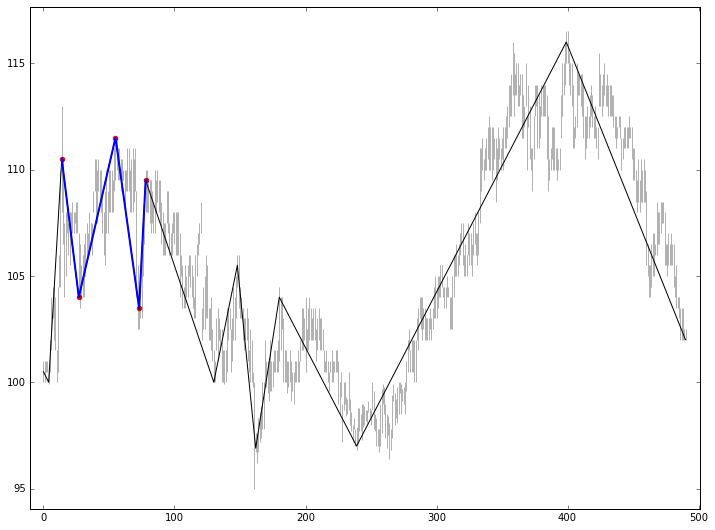

1101.TW :HS@ 20161031


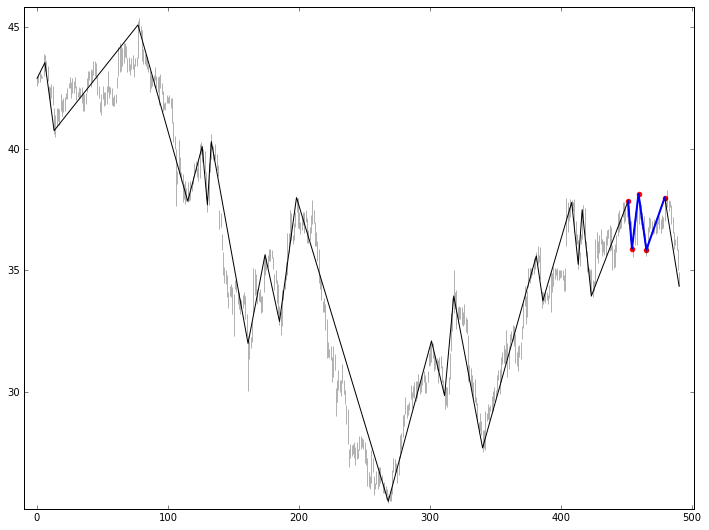

1101.TW :3TOP@ 20160914


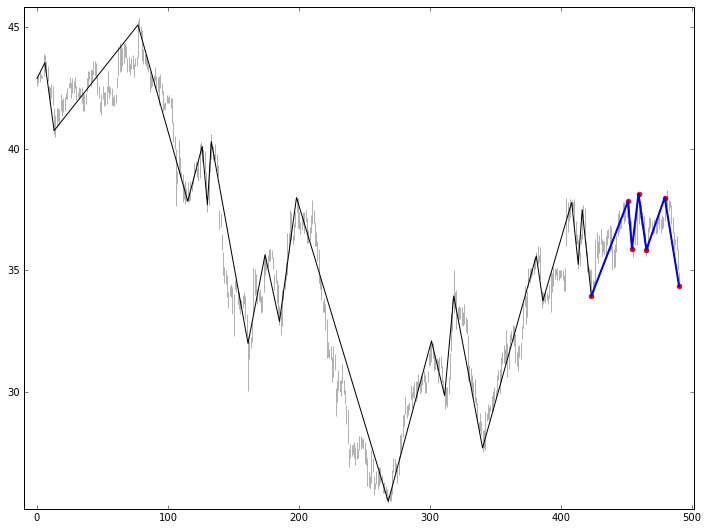

9904.TW :HS@ 20160129


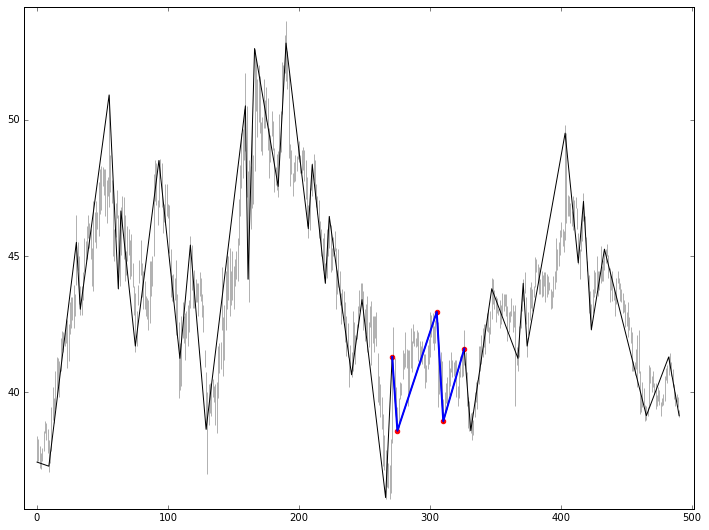

3481.TW :HS@ 20150323


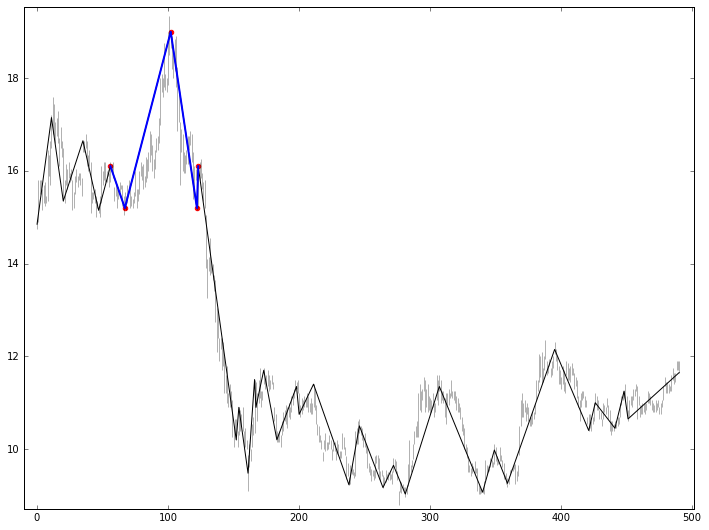

2890.TW :HS@ 20150831


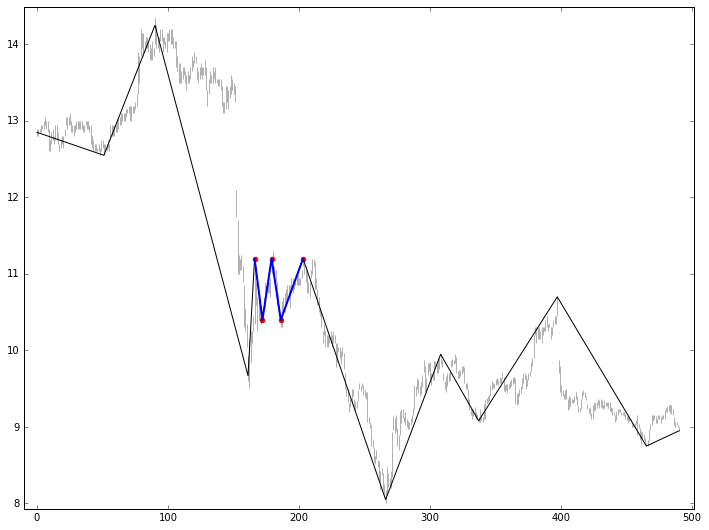

2890.TW :3TOP@ 20150824


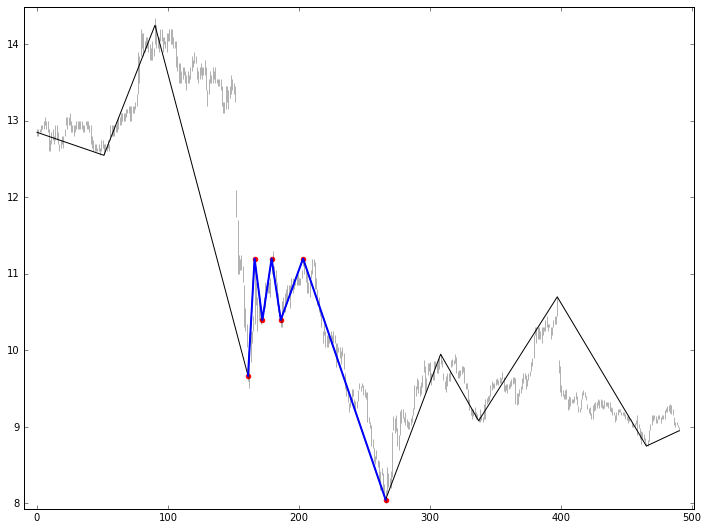

3034.TW :HS@ 20150813


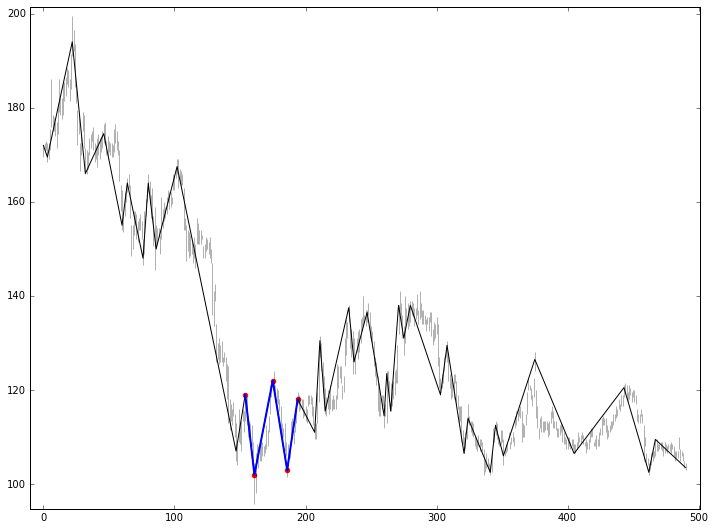

2618.TW :HS@ 20150910


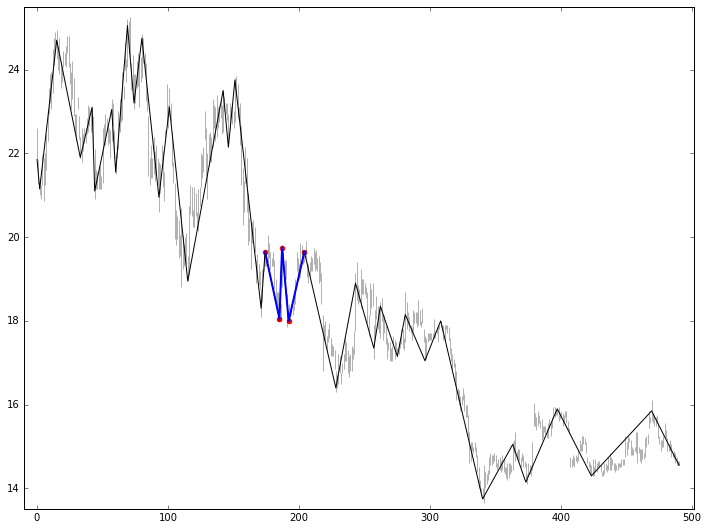

1504.TW :HS@ 20160704


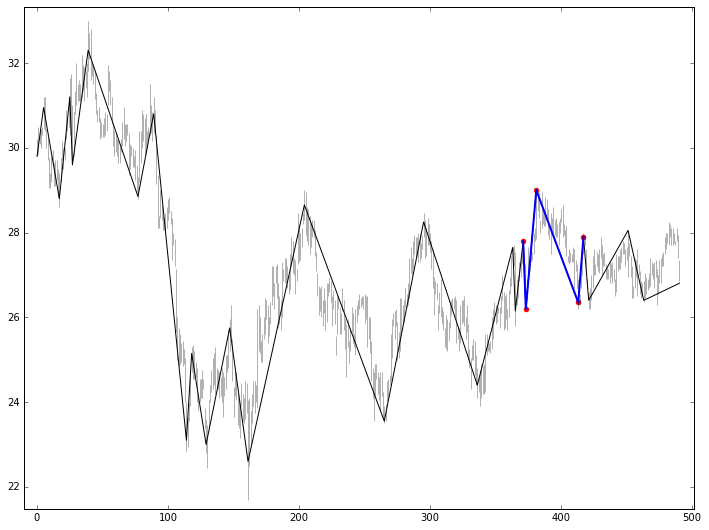

3532.TW :HS@ 20141227


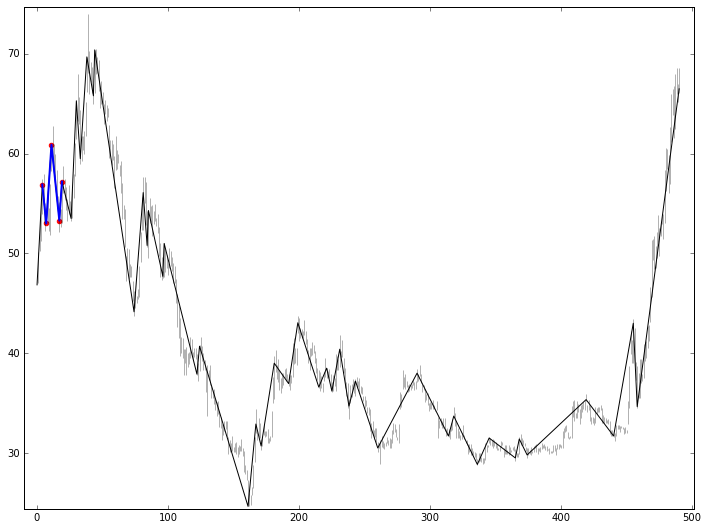

In [20]:
def plot_this_symbol(sid):
    return True # sid == '2330.TW'

delta = 0.005
for pvd in pvdata:
    sid, finder = pvd
    """
    patterns = finder.find_hs(delta)
    for pattern in patterns:
        print sid, ":HS@", finder.klist[pattern[0]].date
        if plot_this_symbol(sid):
            finder.plot(pattern)

    patterns = finder.find_ihs(delta)
    for pattern in patterns:
        print sid, ":IHS@", finder.klist[pattern[0]].date
        if plot_this_symbol(sid):
            finder.plot(pattern)

    patterns = finder.find_double_bottom(delta)
    for pattern in patterns:
        print sid, ":DBOTTOM@", finder.klist[pattern[0]].date
        if plot_this_symbol(sid):
            finder.plot(pattern)

    patterns = finder.find_double_top(delta)
    for pattern in patterns:
        print sid, ":DTOP@", finder.klist[pattern[0]].date
        if plot_this_symbol(sid):
            finder.plot(pattern)

    patterns = finder.find_triple_top(delta)
    for pattern in patterns:
        print sid, ":3TOP@", finder.klist[pattern[0]].date
        if plot_this_symbol(sid):
            finder.plot(pattern)
    """
    patterns = finder.find_triple_bottom(delta)
    for pattern in patterns:
        print sid, ":3BOTTOM@", finder.klist[pattern[0]].date
        if plot_this_symbol(sid):
            finder.plot(pattern)
